In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from analysis import *
sns.set_context('notebook', font_scale=1.3)
sns.set_style('white')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Scratch

In [8]:
exp = '2.9'
pdf = pd.read_pickle(f'/Users/fred/heroku/webofcash2/data/{exp}/participants.pkl')
tdf = pd.read_pickle(f'/Users/fred/heroku/webofcash2/data/{exp}/trials.pkl')
# ids = pd.read_pickle(f'/Users/fred/heroku/webofcash2/identifiers/{exp}.pkl')
pdf['wid'] = pdf.index

In [9]:
def classify(wid):
    p = pdf.loc[wid]
    try:
        d = tdf.loc[wid]
    except:
        return 'non start'
    n_train = sum(d.block != "test")
    if n_train > 19:
        return 'too much training'
    elif n_train < 19:
        return 'incomplete training'
    if p.quiz is None or not all(p.quiz[-1]['correct']):
        return 'fail quiz'
    if p.variance != 'constant' and (p.comprehension is None or not p.comprehension[-1]['correct']):
        return 'fail comprehension'
    n_test = sum(d.block == "test")
    if n_test > 20:
        return 'too much test'
    if n_test < 20:
        'incomplete test'
    return 'complete'
    
status = pdf.wid.apply(classify)

In [10]:
pdf['status'] = pdf.wid.apply(classify)
pdf.query('status != ["non start", "too much training"]').groupby('variance').status.value_counts()

variance    status             
constant    complete               18
            fail quiz               6
            incomplete training     4
decreasing  complete               11
            fail quiz              11
            fail comprehension      3
            incomplete training     1
increasing  complete               16
            fail quiz               6
            incomplete training     3
            fail comprehension      1
Name: status, dtype: int64

In [11]:
stat = status[status != 'non start']
vc = stat.value_counts()
# del vc['too much training']
round(vc / vc.sum(), 2)

complete               0.56
fail quiz              0.29
incomplete training    0.10
fail comprehension     0.05
Name: wid, dtype: float64

In [12]:
import json
q = pdf.quiz.dropna()
flatten = lambda l: [item for sublist in l for item in sublist]
X = [json.loads(x['responses']) for x in flatten(q)]
d = pd.DataFrame(X, columns=['best_val', 'n_click', 'cost', 'bonus'])
for k in d.columns:
    print(d[k].value_counts(), '\n')

$20    90
$10    36
$3      5
$9      3
$1      2
$18     2
$5      1
Name: best_val, dtype: int64 

There is no limit    75
Five times           39
Three times          25
Name: n_click, dtype: int64 

None    82
$1      35
$3      12
$2      10
Name: cost, dtype: int64 

$0.50    78
$1.00    35
$2.50    22
$0.25     4
Name: bonus, dtype: int64 



In [13]:
def failures():
    for q in pdf.quiz.dropna():
        if sum(q[-1]['correct']) != 4:
            yield q
qs = list(failures())
qs[5]

[{'responses': '["$10","Three times","None","$1.00"]',
  'rt': 67072,
  'correct': [True, False, True, False]},
 {'responses': '["$10","Three times","$1","$2.50"]',
  'rt': 86899,
  'correct': [True, False, False, False]},
 {'responses': '["$5","Three times","$1","$2.50"]',
  'rt': 100839,
  'correct': [False, False, False, False]}]

In [14]:
qs = pdf.quiz.dropna()
correct = [q['correct'] for q in flatten(qs)]
x = 1 - np.stack([c for c in correct if sum(c) == 3]).mean(0)
x

array([0.        , 0.35714286, 0.14285714, 0.5       ])

In [301]:
Q = np.stack(pdf.quiz.dropna().apply(lambda q: q[-1]['correct']))
Q.mean(axis=0).round(2)

array([0.89, 0.7 , 0.73, 0.68])

In [198]:
wid = pdf.iloc[1].name
d = tdf.loc[wid]

In [200]:
sum(d.block == "test")

20

'train_final'

In [141]:


# pdf['n_comp'] = pdf.comprehension.apply(len)
# pdf['pass_comp'] = pdf.n_comp <= 2
# pdf.groupby(['variance', 'n_comp']).apply(len)
# pdf.groupby('variance').pass_comp.mean()
# pdf.n_comp.value_counts()

TypeError: object of type 'NoneType' has no len()

In [119]:
pdf = pd.read_pickle('/Users/fred/heroku/webofcash2/data/2.5/participants.pkl')
pdf['n_comp'] = pdf.variance_comprehension.apply(len)
pdf['pass_comp'] = pdf.n_comp <= 2
# pdf.groupby(['variance', 'n_comp']).apply(len)
# pdf.groupby('variance').pass_comp.mean()
pdf.n_comp.value_counts()

1     26
2      5
4      2
53     1
28     1
27     1
12     1
3      1
Name: n_comp, dtype: int64

In [137]:
def cdf(key):
    x = pdf[key].value_counts().sort_index() / len(pdf)
    return x.cumsum()

pdf = pd.read_pickle('/Users/fred/heroku/webofcash2/data/2.5/participants.pkl')
pdf['n_quiz'] = pdf.quiz.apply(len)
pdf['n_comp'] = pdf.variance_comprehension.apply(len)

print('Quiz')
print(cdf('n_quiz'))
print('Variance')
print(cdf('n_comp'))

Quiz
1     0.342105
2     0.684211
3     0.815789
4     0.842105
6     0.868421
8     0.894737
15    0.921053
21    0.947368
30    0.973684
34    1.000000
Name: n_quiz, dtype: float64
Variance
1     0.684211
2     0.815789
3     0.842105
4     0.894737
12    0.921053
27    0.947368
28    0.973684
53    1.000000
Name: n_comp, dtype: float64


In [127]:
pdf = pd.read_pickle('/Users/fred/heroku/webofcash2/data/2.5/participants.pkl')
pdf['n_quiz'] = pdf.quiz.apply(len)
x = pdf.n_quiz.value_counts().sort_index()
x /= len(pdf)
x.cumsum()

# pdf['pass_comp'] = pdf.n_comp <= 2
# # pdf.groupby(['variance', 'n_comp']).apply(len)
# # pdf.groupby('variance').pass_comp.mean()
# pdf.n_comp.value_counts()

1     0.342105
2     0.684211
3     0.815789
4     0.842105
6     0.868421
8     0.894737
15    0.921053
21    0.947368
30    0.973684
34    1.000000
Name: n_quiz, dtype: float64

In [89]:
tdf = pd.read_pickle('/Users/fred/heroku/webofcash2/data/2.3/trials.pkl')
row = tdf.iloc[0]
def check_basic(row):
    if 20 in row.state_rewards and row.score < 15:
        return 'f1'
    if sum(r == -20 for r in row.state_rewards) != 4 and row.score < -15:
        return 'f2'
    return 'pass'
passed = tdf.apply(check_basic, axis=1) == 'pass'
passed.groupby('wid').mean()

wid
w1c5f98b    0.87500
w24aae96    0.59375
w2e1d69a    0.71875
w57f0344    0.96875
w595547c    0.93750
w5cc31f8    0.90625
w65dee49    0.87500
w66937d8    0.90625
w68df53f    0.96875
w6ae1229    0.96875
w75c1fb4    0.75000
w7bd5d1e    0.96875
w818d01b    0.93750
w8dd48ec    0.96875
w94c0a20    0.93750
w94f81d3    0.90625
w9ffcd9b    0.96875
wab740ab    0.96875
wbcebbcd    0.90625
wc9253e1    0.93750
wcf8fc99    0.93750
wde29836    0.75000
we148e3a    0.75000
we41f9bb    0.96875
we57b3c9    0.93750
wf5eceff    0.65625
wf5f510f    0.65625
wfd41ee3    0.62500
dtype: float64

In [147]:
import re
x = pdf.trace[0]
def get_location(trace):
    return re.search('\nloc=(\w+)\n', trace).group(1)
pdf.trace.apply(get_location)

wid
w68ae1fa    US
w0ca3667    US
w8d48c2e    US
wf60f8da    US
wf350818    US
w1408c39    TR
wd28c012    US
w24e9b76    US
w7ad3b8e    US
w9d7a86a    US
wae0d1f8    US
wdf98f82    US
w67bb380    US
w4f79c3a    US
wbfb522a    US
wc0eee91    US
w8c11ba6    US
w5520bce    US
w400ceda    US
wdc6b091    US
w44c1e1f    US
w11216f8    US
w345958e    US
w7a5b82d    US
w2c04368    US
w0fef6d8    US
web2eed8    US
w595547c    US
w7bd5d1e    US
wde29836    US
w1c5f98b    US
w24aae96    US
w9ffcd9b    US
wdde7fd0    US
w2e1d69a    US
wbcebbcd    US
wd7bd3e4    US
w66937d8    US
w94f81d3    US
w6ae1229    US
w75c1fb4    US
we41f9bb    US
wfd41ee3    US
w818d01b    US
w5cc31f8    US
w94c0a20    US
w68df53f    US
we148e3a    US
wf5f510f    US
wc9253e1    US
wcf8fc99    US
w8dd48ec    US
wf5eceff    US
we57b3c9    US
w57f0344    US
w65dee49    US
wab740ab    US
Name: trace, dtype: object

## Load data

In [90]:
EXPERIMENT = 'exp2_pilot'
# EXPERIMENT = 'exp2.4'
pdf, tdf = load_data(EXPERIMENT)
savefig = Figures(f'figs/{EXPERIMENT}').savefig

In [59]:
correct = [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]
pdf['pass_comprehension'] = pdf.variance_comprehension.apply(lambda x: x == correct)

In [65]:
def classify(x):
    print(' '*100, end='\r')
    print(x, end='  ')
    return input()

# inc = pdf.query('variance == "increasing"').variance_comprehension.apply(classify)
# dec = pdf.query('variance == "decreasing"').variance_comprehension.apply(classify)
# pd.concat([inc, dec]).to_pickle(f'data/{EXPERIMENT}/variance_comprehension')

pdf['pass_comprehension'] = pd.read_pickle(f'data/{EXPERIMENT}/variance_comprehension') == 'y'

In [67]:
pdf.groupby('variance').pass_comprehension.mean()

variance
decreasing    0.466667
increasing    0.592593
Name: pass_comprehension, dtype: float64

## Payment

Text(0.5, 1.0, 'Median time: 16.17 minutes')

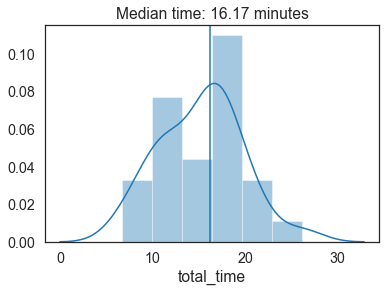

In [180]:
pdf['total_time'] = (pdf.time_end - pdf.time_start) / 1000 / 60
sns.distplot(pdf.total_time)
m = pdf.total_time.median()
plt.axvline(m)
plt.title(f'Median time: {m:.2f} minutes')

Text(0.5, 1.0, 'Median wage: 7.61 $/hr')

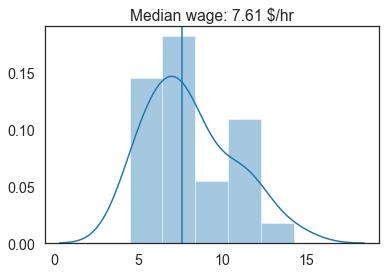

In [181]:
bonus = pdf.final_bonus
wage = 60 * (bonus + 0.5) / pdf.total_time
sns.distplot(wage)
m = wage.median()
plt.axvline(m)
plt.title(f'Median wage: {m:.2f} $/hr')

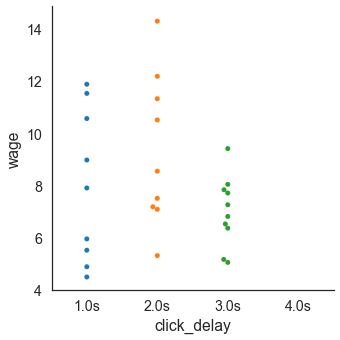

In [183]:
pdf['wage'] = wage
sns.catplot('click_delay', 'wage', data=pdf, kind='swarm',
           order='1.0s 2.0s 3.0s 4.0s'.split())
# sns.catplot('click_delay', 'total_time', data=pdf, kind='point')

## Pareto

In [8]:
models = 'BreadthFirst DepthFirst BestFirst Optimal'.split()
variances = ['decreasing', 'constant', 'increasing']
model_pareto = load_pareto(EXPERIMENT, models)

/usr/local/lib/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  


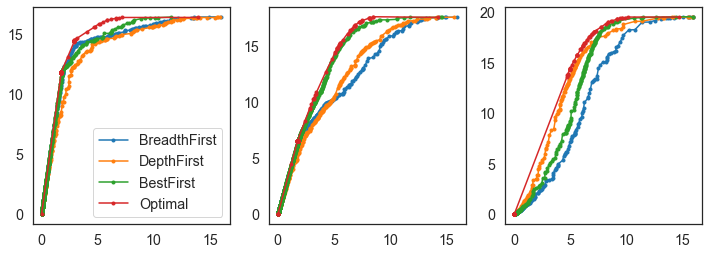

In [27]:
def plot_model(variance, model):
    plt.plot('clicks', 'reward', data=model_pareto.loc[variance, model], label=model, marker='.')

fig, axes = plt.subplots(1, 3, figsize=(12,4))
for i, v in enumerate(variances):
    plt.sca(axes[i])
    for model in models:
        plot_model(v, model)
axes[0].legend()

/usr/local/lib/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  


figs/webofcash/pareto.png


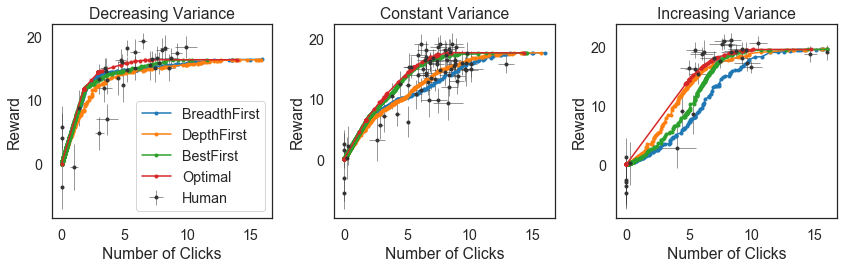

In [28]:
def plot_model(variance, model):
    plt.plot('clicks', 'reward', data=model_pareto.loc[variance, model], label=model, marker='.')

X = tdf.reset_index().set_index('variance')

fig, axes = plt.subplots(1, 3, figsize=(12,4))
for i, v in enumerate(variances):
    plt.sca(axes[i])
    for model in models:
        plot_model(v, model)
        
    g = X.loc[v].groupby('wid'); x = 'n_click'; y = 'score'
    plt.errorbar(g[x].mean(), g[y].mean(), yerr=g[y].sem(), xerr=g[x].sem(), 
                 label='Human', fmt='.', color='#333333', elinewidth=.5)

    plt.title(f'{v.title()} Variance')
    plt.ylabel("Reward")
    plt.xlabel("Number of Clicks")
    if i == 0:
        plt.legend()

savefig('pareto')

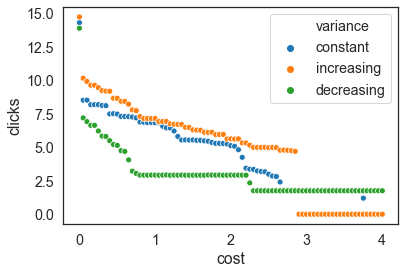

In [457]:
sns.scatterplot('cost', 'clicks', hue='variance',
                data=model_pareto.reset_index().query('model == "Optimal" and cost < 100'))

## Model comparison

In [68]:
models = 'BreadthFirst DepthFirst BestFirst Optimal'.split()
fits = load_fits(EXPERIMENT, models, path='mle')

fits = fits.join(pdf[['variance', 'click_delay', 'pass_comprehension']], on='wid')

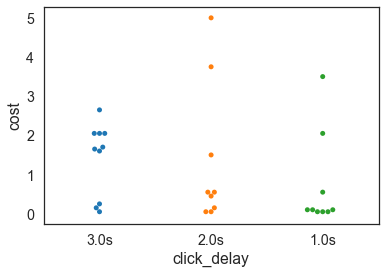

In [8]:
pdf['cost'] = fits.query('model == "Optimal"').set_index('wid').cost.clip(upper=5)
sns.swarmplot('click_delay', 'cost', data=pdf.query('cost < 99'))

In [77]:
# X = fits.groupby(['model', 'variance', 'pass_comprehension', 'wid']).cv_nll.mean()
X = fits.set_index(['model', 'variance', 'pass_comprehension', 'wid']).cv_nll
benefit = X["BestFirst"] - X['Optimal']
benefit.groupby(['variance', 'pass_comprehension']).mean()

variance    pass_comprehension
decreasing  False                 -2.615784
            True                   8.144543
increasing  False                 63.800400
            True                  60.636591
Name: cv_nll, dtype: float64

In [18]:
X = fits.query('pass_comprehension').set_index(['model', 'variance', 'click_delay', 'wid']).cv_nll
benefit = X["BestFirst"] - X['Optimal']
benefit.groupby(['variance', 'click_delay']).mean()

variance    click_delay
decreasing  1.0s           29.147162
            2.0s           21.896592
            3.0s           10.218612
Name: cv_nll, dtype: float64

NameError: name 'facets' is not defined

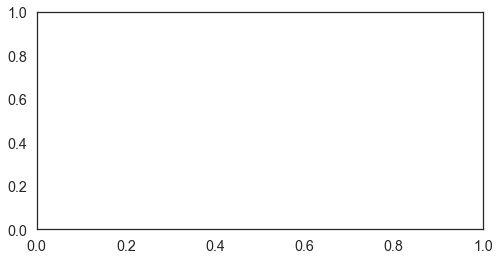

In [83]:
models = ['BreadthFirst', 'DepthFirst', 'BestFirst', 'Optimal']
def plot_participants(val, fits, models):
    sns.swarmplot(y='model', x=val, data=fits, order=models)
    for w, d in fits.groupby('wid'):
        c = 'red' if pdf.pass_comprehension[w] else 'black'
        plt.plot(d.set_index('model').loc[models][val], models, color=c, lw=1, alpha=0.3)
#     plt.plot(fits.set_index('model').loc[models][val])
#     avg = fits.set_index('model').loc[models].groupby('model')[val].mean()
#     plt.scatter(avg.values, avg.index, s=2000, marker='|', c='k')
    plt.ylabel('')
    plt.xlabel('Log Likelihood')

X = fits.reset_index().set_index('pass_comprehension')
fig, axes = plt.subplots(len(variances), 1, figsize=(8,4*len(variances)))
for i, v in enumerate(facets):

    plt.sca(axes.flat[i])
    
    plot_participants('cv_nll', X.loc[v], models)
    plt.title(f'{v.title()}')
    if i != 2:
        plt.xlabel('')
plt.tight_layout()
# savefig('likelihood-individual')

KeyError: '4.0s'

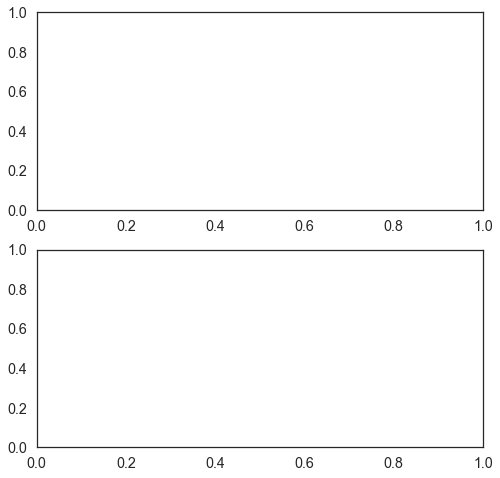

In [81]:
models = ['BreadthFirst', 'DepthFirst', 'BestFirst', 'Optimal']
palette = dict(zip('1.0s 2.0s 3.0s'.split(), sns.color_palette('viridis')[0:-1:2]))

def plot_participants(val, fits, models):
    sns.swarmplot(y='model', x=val, data=fits, order=models, hue='click_delay', palette=palette)
    for w, d in fits.groupby('wid'):
        c = palette[pdf.click_delay[w]]
        plt.plot(d.set_index('model').loc[models][val], models, color=c, lw=2, alpha=0.5)
#     plt.plot(fits.set_index('model').loc[models][val])
#     avg = fits.set_index('model').loc[models].groupby('model')[val].mean()
#     plt.scatter(avg.values, avg.index, s=2000, marker='|', c='k')
    plt.ylabel('')
    plt.xlabel('Log Likelihood')

X = fits.reset_index().set_index('pass_comprehension')
rows = X.index.unique()
fig, axes = plt.subplots(len(rows), 1, figsize=(8,4*len(rows)))
for i, v in enumerate(rows):
    try:
        plt.sca(axes.flat[i])
    except:
        pass
    plot_participants('cv_nll', X.loc[v], models)
    plt.title(('Passed' if v else 'Failed') + ' Comprehension')
    if i != len(rows) - 1:
        plt.xlabel('')
plt.tight_layout()
savefig('decreasing-likelihoods')

figs/exp2_pilot/individual-likelihoods-passed.png


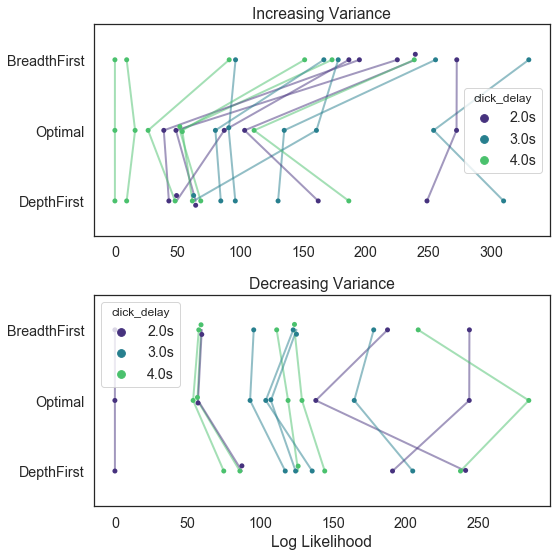

In [88]:
models = ['BreadthFirst', 'Optimal', 'DepthFirst']
cds = '2.0s 3.0s 4.0s'.split()
palette = dict(zip(cds, sns.color_palette('viridis')[0:-1:2]))

def plot_participants(val, fits, models):
    sns.swarmplot(y='model', x=val, data=fits, order=models,
                  hue='click_delay', hue_order=cds, palette=palette)
    for w, d in fits.groupby('wid'):
        c = palette[pdf.click_delay[w]]
        plt.plot(d.set_index('model').loc[models][val], models, color=c, lw=2, alpha=0.5)
#     plt.plot(fits.set_index('model').loc[models][val])
#     avg = fits.set_index('model').loc[models].groupby('model')[val].mean()
#     plt.scatter(avg.values, avg.index, s=2000, marker='|', c='k')
    plt.ylabel('')
    plt.xlabel('Log Likelihood')

X = fits.query('pass_comprehension').reset_index().set_index('variance')

rows = X.index.unique()
fig, axes = plt.subplots(len(rows), 1, figsize=(8,4*len(rows)))
for i, v in enumerate(rows):
    try:
        plt.sca(axes.flat[i])
    except:
        pass
    plot_participants('cv_nll', X.loc[v], models)
#     plt.title(('Passed' if v else 'Failed') + ' Comprehension')
    plt.title(f'{v.title()} Variance')
    if i != len(rows) - 1:
        plt.xlabel('')
plt.tight_layout()
savefig('individual-likelihoods-passed')

figs/webofcash/likelihood.png


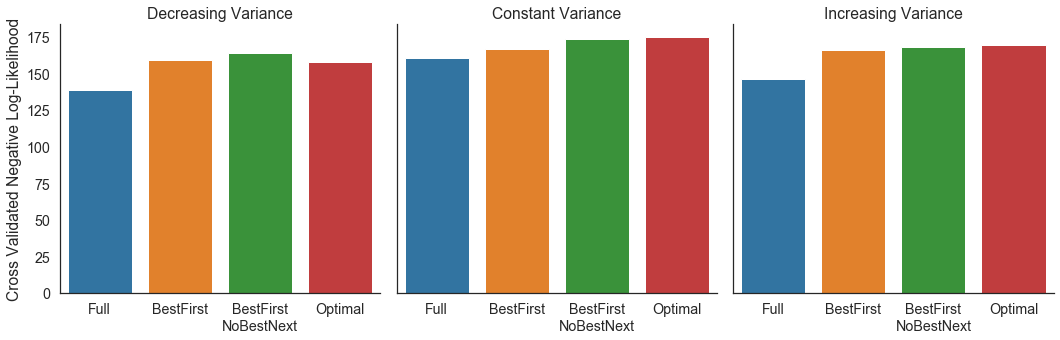

In [32]:
variances = ['decreasing', 'constant', 'increasing']
g = sns.catplot('model', 'cv_nll', col='variance', kind='bar', col_order=variances,
                data=fits, ci=None)
g.set_axis_labels('', 'Cross Validated Negative Log-Likelihood')
g.set_xticklabels(['Full', 'BestFirst', 'BestFirst\nNoBestNext', 'Optimal'])
for ax, v in zip(g.axes.flat, variances):
    ax.set_title(f'{v.title()} Variance')
savefig('likelihood')

In [37]:
# pdf['cost'] = d.cost.clip(upper=4)
# g = sns.jointplot('n_click', 'cost', hue=data=pdf)
# plt.sca(g.ax_joint)
# plt.xlabel("Number of Clicks")
# plt.ylabel("Inferred Cost")
# savefig('click_cost_joint')

## Qualitative

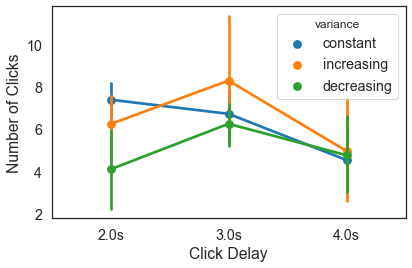

In [551]:
sns.pointplot('click_delay', 'n_click', hue='variance', kind='point', data=pdf)
# sns.swarmplot('click_delay', 'n_click', hue='variance', data=pdf)
plt.xlabel('Click Delay')
plt.ylabel('Number of Clicks')
savefig('click_delay')

In [611]:
def unroll(df):
    rows = []
    for row in df.itertuples():
        cm = pd.Series(depth[c] for c in row.clicks).cummax()
        for i, c in enumerate(cm):
            rows.append([row.variance, i,])
    return pd.DataFrame(rows, columns=['variance', 'idx', 'depth'])

clicks = unroll(df)

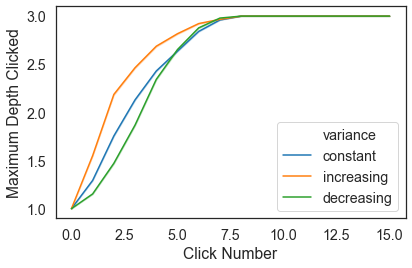

In [614]:
sns.lineplot('idx', 'depth', hue='variance', data=clicks)
plt.xlabel('Click Number')
plt.ylabel('Maximum Depth Clicked')
savefig('maxdepth')

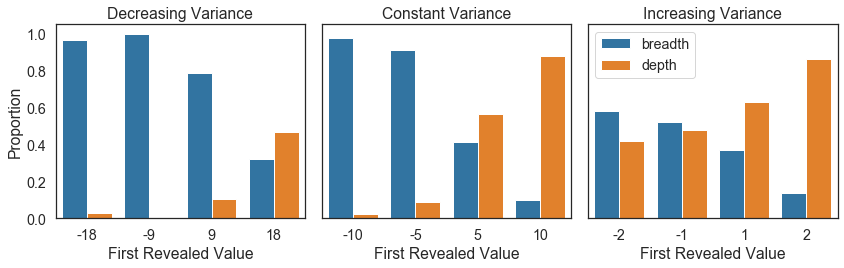

In [488]:
# tree = [[1, 5, 9, 13], [2], [3, 4], [], [], [6], [7, 8], [], [], [10], [11, 12], [], [], [14], [15, 16], [], []]
depth = [0, 1, 2, 3, 3, 1, 2, 3, 3, 1, 2, 3, 3, 1, 2, 3, 3]

def first_revealed(row):
    if len(row.clicks) < 1:
        return 0
    return row.state_rewards[row.clicks[0]]
    
def second_click(row):
    if len(row.clicks) < 2:
        return 'none'
    c1 = row.clicks[1]
    if depth[c1] == 1:
        return 'breadth'
    if depth[c1] == 2:
        return 'depth'

tdf['second_click'] = tdf.apply(second_click, axis=1)
tdf['first_revealed'] = tdf.apply(first_revealed, axis=1)
X = tdf.groupby(['variance', 'first_revealed', 'second_click']).apply(len)
N = tdf.groupby(['variance', 'first_revealed']).apply(len)
X = (X / N).rename('rate').reset_index()

fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
order = ['decreasing', 'constant', 'increasing']
for i, (var, d) in enumerate(X.query('second_click != "none"').groupby('variance')):
    i = order.index(var)
    ax = axes[i]; plt.sca(ax)
    sns.barplot('first_revealed', 'rate', hue='second_click', data=d)
    plt.title(f'{var.title()} Variance')
    plt.xlabel('First Revealed Value')
    if i == 0:
        plt.ylabel('Proportion')
    else:
        plt.ylabel('')
    if i == 2:
        ax.legend().set_label('Second Click')
    else:
        ax.legend().remove()
savefig('breadth-depth')

plot_breadth_depth(tdf)

In [ ]:
import json

def parse_sim_clicks(x):
    if x == "Int64[]":
        return []
    else:
        return json.loads(x)
    
sdf = pd.concat(
    pd.read_csv(f"model/results/{code}/simulations.csv")
    for code in CODES
)
sdf['clicks'] = sdf.clicks.apply(parse_sim_clicks)
sdf.state_rewards = sdf.state_rewards.apply(json.loads)
sdf['second_click'] = sdf.apply(second_click, axis=1)
sdf['first_revealed'] = sdf.apply(first_revealed, axis=1)
sdf['model'] =  sdf.wid.str.split('-').str[0]

sdf.set_index('mdp', inplace=True)
sdf['variance'] = mdps.variance
sdf.reset_index(inplace=True)
sdf.set_index('model', inplace=True)

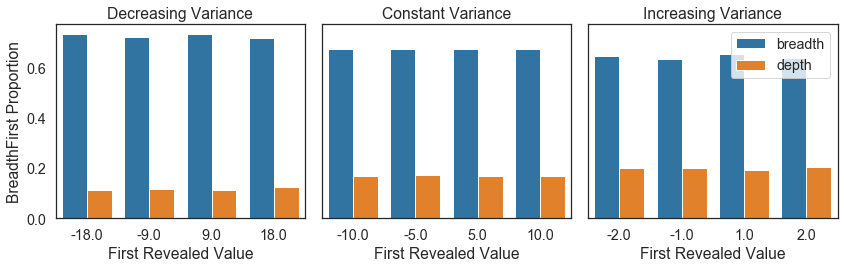

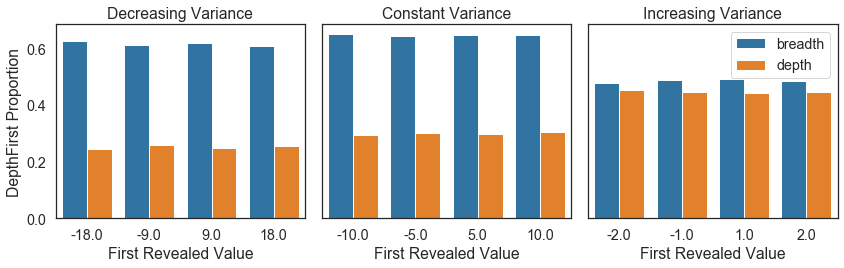

In [547]:
def plot_breadth_depth_model(model):
    df = sdf.loc[model]
    X = df.groupby(['variance', 'first_revealed', 'second_click']).apply(len)
    N = df.groupby(['variance', 'first_revealed']).apply(len)
    X = (X / N).rename('rate').reset_index()

    fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
    order = ['decreasing', 'constant', 'increasing']
    for i, (var, d) in enumerate(X.query('second_click != "none"').groupby('variance')):
        i = order.index(var)
        ax = axes[i]; plt.sca(ax)
        sns.barplot('first_revealed', 'rate', hue='second_click', data=d)
        plt.title(f'{var.title()} Variance')
        plt.xlabel('First Revealed Value')
        if i == 0:
            plt.ylabel(f'{model} Proportion')
        else:
            plt.ylabel('')
        if i == 2:
            ax.legend().set_label('Second Click')
        else:
            ax.legend().remove()
    savefig(f'breadth-depth-{model}')

# plot_breadth_depth_model('Optimal')
# plot_breadth_depth_model('BestFirst')
plot_breadth_depth_model('BreadthFirst')
plot_breadth_depth_model('DepthFirst')

# Old

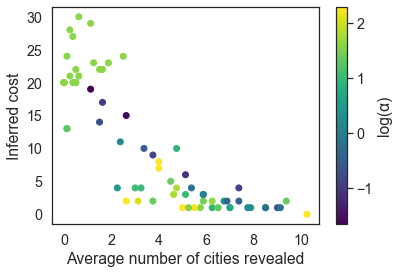

In [9]:
plt.scatter(df.n_reveal/8, df.cost, c=np.log(df.α), cmap='viridis')
plt.xlabel("Average number of cities revealed")
plt.ylabel("Inferred cost")
plt.colorbar(label='log(α)')

In [8]:
df.head()

,icelandic,wid,autocomplete,cost,α,ε,logp,difficulty,mean_rt,n_reveal,condition
0,False,w00fc5e9,False,20.0,5.000500,0.001000,-0.007276,0,NaN,0,Baseline
1,False,w03de12b,True,24.0,5.000500,0.122375,-5.440824,-1,5796.000000,1,Autocomplete
2,True,w04e764c,False,1.0,4.981634,0.497254,-100.268012,1,4319.630435,46,Icelandic
3,True,w0c105b0,False,10.0,0.617647,0.318875,-65.961152,1,6383.729958,27,Icelandic
4,True,w0cfe586,False,4.0,6.230614,0.747717,-81.599899,1,3907.973684,38,Icelandic


Text(55.46783205555556, 0.5, 'Inferred cost')

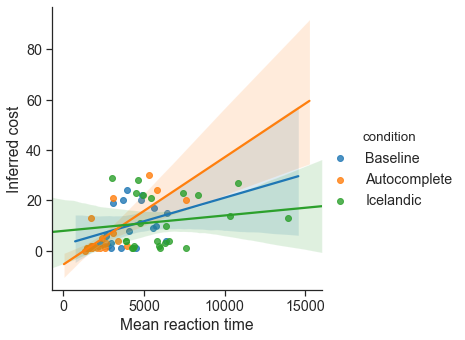

In [15]:
# plt.scatter(df.mean_rt, df.cost, color=df.difficulty)
sns.lmplot('mean_rt', 'cost', hue='condition', data=df, fit_reg=1)
plt.xlabel("Mean reaction time")
plt.ylabel("Inferred cost")
# plt.colorbar(label='log(α)')

In [18]:
def cond_plot(y, exclude=True):
    d = df.query('n_reveal >= 8') if exclude else df
    order=['Autocomplete', 'Baseline', 'Icelandic']
    sns.pointplot('condition', y, data=d,
                 order=order, alpha=0.1)
    sns.swarmplot('condition', y, data=d,
                  order=order, color='black')
    plt.savefig(f'figs/{y}.pdf')

In [28]:
df

,icelandic,wid,autocomplete,cost,α,ε,logp,difficulty,mean_rt,n_reveal,condition
0,False,w00fc5e9,False,20.0,5.000500,0.001000,-0.007276,0,NaN,0,Baseline
1,False,w03de12b,True,24.0,5.000500,0.122375,-5.440824,-1,5796.000000,1,Autocomplete
2,True,w04e764c,False,1.0,4.981634,0.497254,-100.268012,1,4319.630435,46,Icelandic
3,True,w0c105b0,False,10.0,0.617647,0.318875,-65.961152,1,6383.729958,27,Icelandic
4,True,w0cfe586,False,4.0,6.230614,0.747717,-81.599899,1,3907.973684,38,Icelandic
...,...,...,...,...,...,...,...,...,...,...,...
67,True,wed9b70f,False,1.0,2.093456,0.160804,-107.218848,1,4227.214286,56,Icelandic
68,False,wf4d7c65,True,3.0,5.984996,0.815222,-83.432818,-1,2624.611111,37,Autocomplete
69,True,wf90f4a6,False,14.0,0.494277,0.001000,-34.108986,1,10317.521102,12,Icelandic
70,False,wf9223a1,True,4.0,0.845244,0.001000,-75.032274,-1,3387.880952,43,Autocomplete


In [26]:
df.cost.value_counts()

1.0     15
20.0    10
2.0      9
4.0      6
3.0      4
22.0     3
24.0     2
23.0     2
10.0     2
13.0     2
21.0     2
5.0      1
6.0      1
29.0     1
11.0     1
17.0     1
14.0     1
30.0     1
7.0      1
19.0     1
28.0     1
27.0     1
8.0      1
15.0     1
0.0      1
9.0      1
Name: cost, dtype: int64

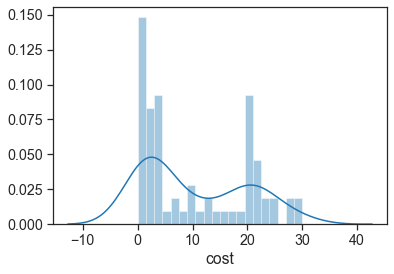

In [24]:
sns.distplot(df.cost, bins=20)

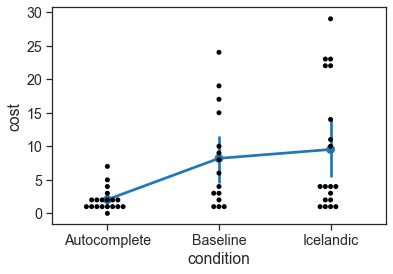

In [79]:
cond_plot('cost', exclude=True)

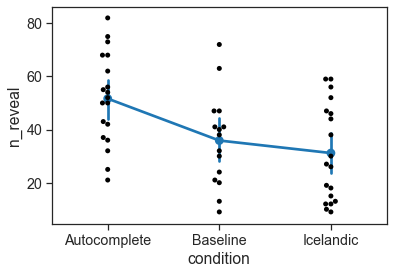

In [20]:
cond_plot('n_reveal', True)

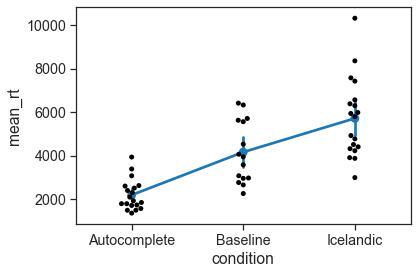

In [21]:
cond_plot('mean_rt', True)

# Likelihood breakdown

In [4]:
models = "Optimal BestFirst MetaGreedy BiasedOptimal BiasedBestFirst BiasedMetaGreedy".split()
models = "BestFirst Optimal MetaGreedy BiasedBestFirst BiasedOptimal BiasedMetaGreedy".split()

paired = sns.palettes.color_palette('Paired')
pal = dict(zip(models, [*paired[1:7:2], *paired[0:6:2]]))

In [5]:
df = pd.read_csv('julia/real_results/likelihoods.csv')
df['full_model'] = df.biased.apply(lambda x: 'Biased' if x else '') + df.model

no_click = df.query('full_model == "Optimal"').groupby(['map', 'wid']).apply(len) < 2
usually_click = no_click.groupby('wid').sum() <= 2
print(usually_click.mean())
df = df.set_index('wid').loc[usually_click]
len(df.reset_index().wid.unique())

0.5833333333333334


42

In [9]:
d = df.set_index('full_model').logp
diff = d['BiasedOptimal'] - d['BiasedBestFirst']

In [10]:
stim = df.groupby(['full_model', 'map']).logp.sum()
diff = stim['BiasedOptimal'] - stim['BiasedBestFirst']
diff

map
fantasy_map_1560976725599.png    100.928287
fantasy_map_1560976804519.png     -9.640754
fantasy_map_1560976821363.png     15.589968
fantasy_map_1560976853546.png     15.070749
fantasy_map_1560976873961.png      3.251478
fantasy_map_1560976890783.png     17.408780
fantasy_map_1560976900330.png     20.198196
fantasy_map_1560977229084.png     15.917673
Name: logp, dtype: float64

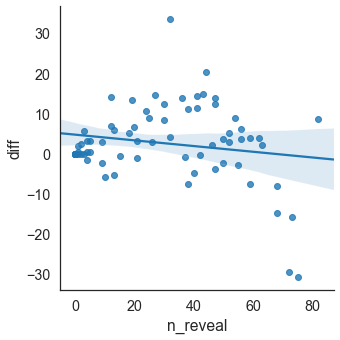

In [337]:
d = ind.set_index(['full_model', 'wid']).logp
diff = d['BiasedOptimal'] - d['BiasedBestFirst']
data = pdf.set_index('wid')[['logp', 'n_reveal', 'cost']]
data['diff'] = diff
sns.lmplot('n_reveal', 'diff', data=data)

In [12]:
ind = df.groupby(['full_model', 'wid']).logp.sum().reset_index()
n_obs = df.groupby('wid').apply(len) / len(models)
ind['avg_logp'] = list(ind.set_index('wid').logp / n_obs)

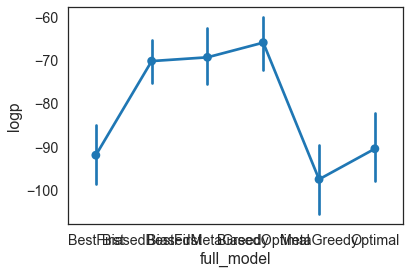

In [16]:
# sns.pointplot('full_model', 'logp', data=ind, )


In [20]:
val = 'logp'
avg = ind.set_index('full_model').loc[models].groupby('full_model')[val].mean()
plt.plot(avg.values, avg.index)

full_model
BestFirst          -91.950733
BiasedBestFirst    -70.255858
BiasedMetaGreedy   -69.388097
BiasedOptimal      -66.000516
MetaGreedy         -97.521456
Optimal            -90.470338
Name: logp, dtype: float64

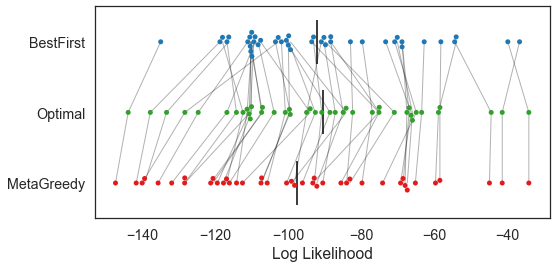

In [49]:
# horizontal orientation

def plot_line(models, d, val):
    plt.plot(models, d.set_index('full_model').loc[models][val], color='k', lw=1, alpha=0.3)

def plot_participants(val, models=models):
    plt.figure(figsize=(8,4))
    sns.swarmplot(y='full_model', x=val, data=ind, order=models, palette=pal, )
    for w, d in ind.groupby('wid'):
        plt.plot(d.set_index('full_model').loc[models][val], models, color='k', lw=1, alpha=0.3)
#     plt.plot(ind.set_index('full_model').loc[models][val])
    avg = ind.set_index('full_model').loc[models].groupby('full_model')[val].mean()
    plt.scatter(avg.values, avg.index, s=2000, marker='|', c='k')
    plt.ylabel('')
    plt.xlabel('Log Likelihood')

plot_participants('logp', models=models[:3])
plt.tight_layout()
plt.savefig('individual_likelihood_nobias.pdf')

In [44]:
alt_models = models[::3] + models[1::3] + models[2::3]

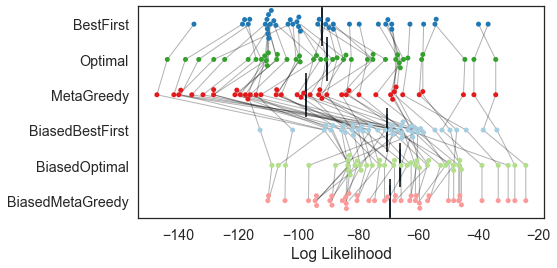

In [48]:
plot_participants('logp', models=models)
plt.tight_layout()
plt.savefig('individual_likelihood.pdf')

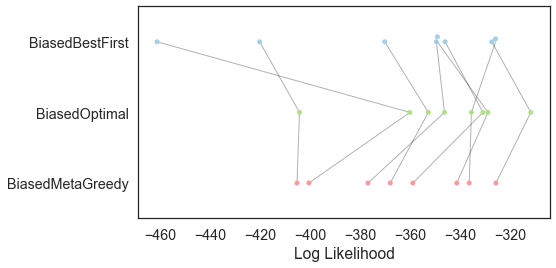

In [53]:
stim = df.groupby(['full_model', 'map']).logp.sum().reset_index()

def plot_participants(val, models=models):
    plt.figure(figsize=(8,4))
    sns.swarmplot(y='full_model', x=val, data=stim, order=models, palette=pal, )
    for w, d in stim.groupby('map'):
        plt.plot(d.set_index('full_model').loc[models][val], models, color='k', lw=1, alpha=0.3)
#     plt.plot(stim.set_index('full_model').loc[models][val])
#     avg = stim.set_index('full_model').loc[models].groupby('full_model')[val].mean()
#     plt.scatter(avg.values, avg.index, s=2000, marker='|', c='k')
    plt.ylabel('')
    plt.xlabel('Log Likelihood')
        
plot_participants('logp', models=models[3:])
plt.tight_layout()
plt.savefig('map_likelihood.pdf')

# Termination

In [12]:
df = pd.read_csv(f'model/results/{EXPERIMENT}/features.csv')
df.term_reward = df.term_reward.apply(int)

def get_agent(wid):
    return wid.split('-')[0] if '-' in wid else 'Human'

df['agent'] = df.wid.apply(get_agent)

In [32]:
def savefig(name):
    plt.tight_layout()
    plt.savefig(f'figs/{name}.png', dpi=300)

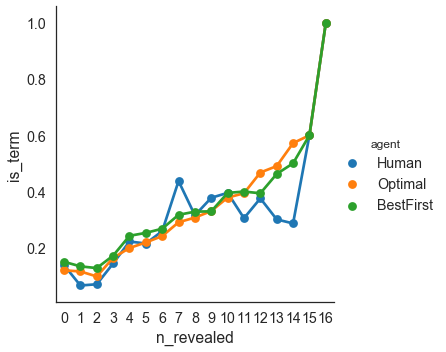

In [21]:
sns.catplot('n_revealed', 'is_term', data=df, kind='point', hue='agent', ci=False)
savefig('term_revealed')

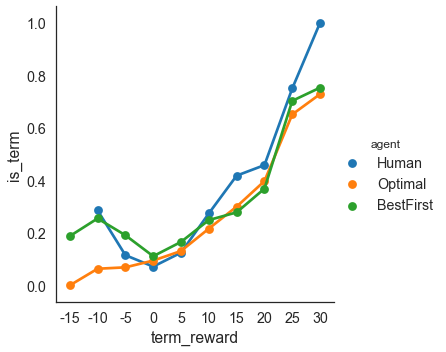

In [25]:
sns.catplot('term_reward', 'is_term', data=df, kind='point', hue='agent', ci=False)
savefig('term_reward')

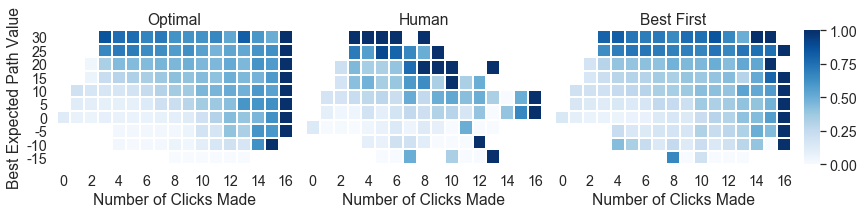

In [33]:
# x = df.groupby(['etr', 'n_revealed']).is_term.mean().reset_index()
def robust_mean(x):
    return np.mean(x)
    if len(x) < 5:
        return np.nan
    return np.mean(x)

# lims = {''}

def plot_adaptive(df, **kws):
    X = df.groupby(['term_reward', 'n_revealed']).is_term.apply(robust_mean).unstack()
    # X = df.groupby(['etr', 'n_revealed']).apply(len).unstack()
    sns.heatmap(X, cmap='Blues', linewidths=1, **kws).invert_yaxis()
    plt.xlabel('Number of Clicks Made')
#     plt.ylim(*lims['y'])
#     plt.xlim(*lims['x'])

    
fig, axes = plt.subplots(1, 4, figsize=(12, 3),
                         gridspec_kw={'width_ratios': [15, 15, 15, 1]})

# fig, axes = plt.subplots(1, 2, figsize=(8,4))

plt.sca(axes[0])
plot_adaptive(df.query('agent == "Optimal"'), cbar_ax=axes[3])
plt.ylabel("Best Expected Path Value")
plt.title("Optimal")

plt.sca(axes[1])
plot_adaptive(df.query('agent == "Human"'), cbar=False)
plt.title("Human")
plt.ylabel("")
plt.yticks(())

plt.sca(axes[2])
plot_adaptive(df.query('agent == "BestFirst"'), cbar=False)
plt.title("Best First")
plt.ylabel("")
plt.yticks(())
savefig('adaptive_satisficing')

# Scratch

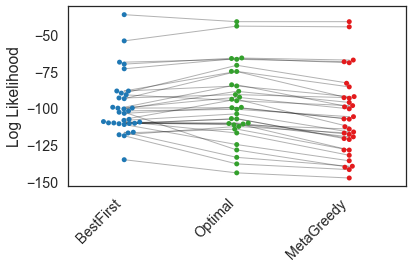

In [286]:
def plot_line(models, d, val):
    plt.plot(models, d.set_index('full_model').loc[models][val], color='k', lw=1, alpha=0.3)

def plot_participants(val, models=models):
    ax = sns.swarmplot('full_model', val, data=ind, order=models, palette=pal)
    for w, d in ind.groupby('wid'):
        plot_line(models, d, val)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.xlabel('')
    plt.ylabel('Log Likelihood')
#         plot_line(models[:3], d, val)
#         plot_line(models[3:], d, val)
        
plot_participants('logp', models=models[:3])
plt.tight_layout()
plt.savefig('individual_likelihood_nobias.pdf')

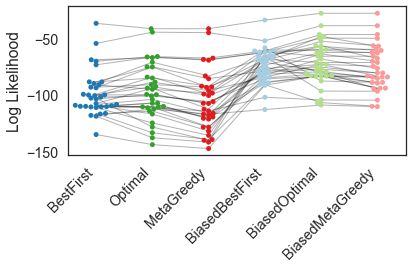

In [287]:
plot_participants('logp', models=models)
plt.tight_layout()
plt.savefig('individual_likelihood.pdf')

In [ ]:
import json
# EXPERIMENT = 'webofcash-pilot-1.1'
EXPERIMENT = 'webofcash-1.2'
def load_trials(experiment):
    with open(f'data/{experiment}/trials.json') as f:
        data = json.load(f)

    for wid, trials in data.items():
        for t in trials:
            t['wid'] = wid
            yield t
            
data = pd.DataFrame(load_trials(EXPERIMENT))
data['n_click'] = data.reveals.apply(len)
data['raw_reward'] = data.score + data.n_click  # assumes cost = 1
